# DS - EDA Project - Top Running Times
Resources:<br>
1) Data set - taken from Kaggle - https://www.kaggle.com/datasets/jguerreiro/running <br>
2) Continents.csv - generated manually <br>
3) Runners age categories - taken from: https://northstowehalf.co.uk/age-groups/
* Runners age categories wasn't sufficeint for our data set - further categories were built

## Imports and read files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as mtick
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df_region= pd.read_csv('continents2.csv')
df.shape

(18244, 10)

## Init data frames

### init columns: Region, Time_Delta, Time_Delta_Seconds, Age

In [3]:
df_region.rename(columns={"alpha-3": "Country","region":"Region"},inplace=True)
print(df.shape)
df_region = df_region[['Country','Region']].copy()
print(df.shape)
df= df.merge(df_region, how='left', on="Country")
print(df.shape)
df['Time_Delta'] = pd.to_timedelta(df['Time']).copy()
print(df.shape)
df['Time_Delta_Seconds'] = (df['Time_Delta'].dt.total_seconds()).copy()
print(df.shape)
# add calculated age column for future exploration by age of runners
df['Age'] = (
    ((pd.to_datetime(df['Date']) - pd.to_datetime(df['Date of Birth']))/pd.Timedelta('365 days')).round().astype(int)
).copy()
print(df.shape)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
print(df.shape)
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1960-1970', '1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']
df['Year_Cat'] = pd.cut(df['Year'], bins=bins, labels=labels)
print(df.shape)
def g(df):
    df['Event_Clean'] = df['Event'].str.replace(',','').str.replace(' ','').str.replace('m','')
    df.loc[df['Event'].str.contains('Half'), 'Event_Clean'] = '21100'
    df.loc[df['Event'].str.contains('Marathon'), 'Event_Clean'] = '42200'
    return df

df = g(df.copy())
df['Event_Clean'] = df['Event_Clean'].astype(int)

(18244, 10)
(18244, 10)
(18244, 11)
(18244, 12)
(18244, 13)
(18244, 14)
(18244, 15)
(18244, 16)


In [4]:
df['Region'].unique()
df.loc[df.Region.isna()].Country.unique()

array([], dtype=object)

### init age categories column

In [5]:
def categorize_age_women(df):
  """
  This function takes a DataFrame with an 'Age' column and adds a new 'Category' column based on provided criteria.

  Args:
      df (pandas.DataFrame): The DataFrame containing the 'Age' column.

  Returns:
      pandas.DataFrame: The DataFrame with the new 'Category' column.
  """
  categories = ['U13 Girls', 'U15 Girls', 'FJ Female Junior', 'FS Female Senior',
                'F35 Female Masters', 'F45 Female Masters', 'F55 Female Masters',
                'F65 Female Masters', 'F75+ Female Masters']
  bins = [10, 12, 14, 19, 34, 44, 54, 64, 74, 100]
  labels = pd.cut(df.loc[df['Gender']=='Women']['Age'], bins, labels=categories)
  return df.assign(Category=labels)

def categorize_age_men(df):
  """
  This function takes a DataFrame with an 'Age' column and adds a new 'Category' column based on provided criteria.

  Args:
      df (pandas.DataFrame): The DataFrame containing the 'Age' column.

  Returns:
      pandas.DataFrame: The DataFrame with the new 'Category' column.
  """
  categories = ['U13 Boys', 'U15 Boys', 'MJ Male Junior', 'MS Male Senior',
                'M40 Male Masters', 'M50 Male Masters', 'M60 Male Masters',
                'M70 Male Masters', 'M80+ Male Masters']
  bins = [10, 12, 14, 19, 39, 49, 59, 69, 79, 100]
  labels = pd.cut(df.loc[df['Gender']=='Men']['Age'], bins, labels=categories)
  return df.assign(Category=labels)

def categorize_age_non_binary(df):
  """
  This function takes a DataFrame with an 'Age' column and adds a new 'Category' column based on provided criteria.

  Args:
      df (pandas.DataFrame): The DataFrame containing the 'Age' column.

  Returns:
      pandas.DataFrame: The DataFrame with the new 'Category' column.
  """
  categories = ['N13', 'N15', 'NJ', 'N20',
                'N25', 'N30', 'N35',
                'N40', 'N50', 'N60',
                'N70', 'N80+']
  bins = [10, 12, 14, 19, 24, 29, 34, 39, 49, 59, 69, 79, 100]
  labels = pd.cut(df['Age'], bins, labels=categories)
  return df.assign(Category=labels)

df = categorize_age_non_binary(df.copy())

In [6]:
df.shape

(18244, 18)

## Examine data

### 1. show head, shape, info, unique values etc

In [7]:
df.sample(3)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
2866,864,00:27:37.080000,Henry Rono,KEN,1952-02-12,2.0,London,1977-09-09,Men,"10,000 m",Africa,0 days 00:27:37.080000,1657.08,26,1977,1971-1980,10000,N25
16898,659,00:31:38.170000,Wang Junxia,CHN,1973-01-09,1.0,Beijing,1994-05-06,Women,"10,000 m",Asia,0 days 00:31:38.170000,1898.17,21,1994,1991-2000,10000,N20
12859,626,00:13:03.850000,Lawi Lalang,KEN,1991-06-15,6.0,Saint-Denis,2014-07-05,Men,5000 m,Africa,0 days 00:13:03.850000,783.85,23,2014,2011-2020,5000,N20


In [8]:
df.shape

(18244, 18)

In [9]:
df.columns

Index(['Rank', 'Time', 'Name', 'Country', 'Date of Birth', 'Place', 'City',
       'Date', 'Gender', 'Event', 'Region', 'Time_Delta', 'Time_Delta_Seconds',
       'Age', 'Year', 'Year_Cat', 'Event_Clean', 'Category'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18244 entries, 0 to 18243
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Rank                18244 non-null  int64          
 1   Time                18244 non-null  object         
 2   Name                18244 non-null  object         
 3   Country             18244 non-null  object         
 4   Date of Birth       18244 non-null  object         
 5   Place               18236 non-null  float64        
 6   City                18244 non-null  object         
 7   Date                18244 non-null  datetime64[ns] 
 8   Gender              18244 non-null  object         
 9   Event               18244 non-null  object         
 10  Region              18244 non-null  object         
 11  Time_Delta          18244 non-null  timedelta64[ns]
 12  Time_Delta_Seconds  18244 non-null  float64        
 13  Age                 18244 non-n

In [11]:
df.nunique()

,0
Rank,1000
Time,5997
Name,2903
Country,106
Date of Birth,2669
Place,20
City,663
Date,3440
Gender,2
Event,9


In [12]:
print("Events types:",", ".join(str(x) for x in df.Event.unique()))

Events types: 800 m, 400 m, 10,000 m, Marathon, 100 m, Half marathon, 200 m, 1500 m, 5000 m


In [13]:
print("Number of cities hosted competetions:", len(df.City.unique()))

Number of cities hosted competetions: 663


In [14]:
print("Number of countries hosted competetions:", len(df.Country.unique()),"\n")
df.Country.unique()

Number of countries hosted competetions: 106 



array(['KEN', 'DEN', 'GBR', 'BOT', 'BRA', 'SUD', 'ETH', 'RUS', 'BIH',
       'FRA', 'SUI', 'NOR', 'USA', 'ALG', 'RSA', 'BRN', 'BDI', 'CUB',
       'DJI', 'POL', 'MAR', 'NED', 'VEN', 'SOM', 'FRG', 'KSA', 'LAT',
       'CAN', 'ITA', 'UGA', 'ESP', 'QAT', 'GDR', 'BEL', 'GER', 'TUR',
       'SEN', 'CRO', 'FIN', 'KUW', 'KOR', 'NZL', 'COL', 'CZE', 'UKR',
       'AUS', 'MEX', 'BAH', 'NGR', 'JAM', 'BUL', 'CHN', 'ROU', 'ZAM',
       'BLR', 'ERI', 'TAN', 'POR', 'RWA', 'JPN', 'LTU', 'ECU', 'AUT',
       'ARG', 'IRL', 'CIV', 'GRE', 'TTO', 'CMR', 'MOZ', 'SLO', 'KAZ',
       'UZB', 'SUR', 'PRK', 'TJK', 'NAM', 'BAR', 'ZIM', 'ANT', 'AHO',
       'SKN', 'CAY', 'GHA', 'GRN', 'COD', 'DOM', 'OMA', 'SWE', 'CRC',
       'SRI', 'MRI', 'SVK', 'PUR', 'GEO', 'PAN', 'AZE', 'HUN', 'GUY',
       'CHI', 'AIA', 'MDA', 'SRB', 'UAE', 'KGZ', 'TUN'], dtype=object)

In [15]:
df.Gender.value_counts()

,count
Gender,
Men,9128
Women,9116


In [16]:
df.Country.value_counts().head(10)

,count
Country,
KEN,4226
USA,3174
ETH,1909
JAM,1095
RUS,928
GBR,529
JPN,440
MAR,380
GER,306


In [17]:
df.Country.value_counts().tail(10)

,count
Country,
ECU,2
CHI,2
ZAM,2
SVK,1
PUR,1
KUW,1
GUY,1
AIA,1
UAE,1


In [18]:
df.isnull().sum()

,0
Rank,0
Time,0
Name,0
Country,0
Date of Birth,0
Place,8
City,0
Date,0
Gender,0
Event,0


In [19]:
# NaN values
df.loc[df['Place'].isnull()]

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
5891,791,00:01:58.100000,Mariya Savinova,RUS,1985-08-13,NaN,Lausanne,2012-08-23,Women,800 m,Europe,0 days 00:01:58.100000,118.10,27,2012,2011-2020,800,N25
9711,519,00:00:22.300000,Jackie Joyner-Kersee,USA,1962-03-03,NaN,Indianapolis,1988-07-15,Women,200 m,Americas,0 days 00:00:22.300000,22.30,26,1988,1981-1990,200,N25
10005,788,00:00:22.390000,Dafne Schippers,NED,1992-06-15,NaN,Götzis,2015-05-30,Women,200 m,Europe,0 days 00:00:22.390000,22.39,23,2015,2011-2020,200,N20
12144,914,00:04:02.330000,Olga Zhuravlyova,RUS,1956-01-01,NaN,Kiev,1984-06-22,Women,1500 m,Europe,0 days 00:04:02.330000,242.33,28,1984,1981-1990,1500,N25
12152,923,00:04:02.350000,Ravilya Agletdinova,BLR,1960-10-02,NaN,Kiev,1984-06-22,Women,1500 m,Europe,0 days 00:04:02.350000,242.35,24,1984,1981-1990,1500,N20
12153,923,00:04:02.350000,Nadezhda Ralldugina,RUS,1957-11-15,NaN,Kiev,1984-06-22,Women,1500 m,Europe,0 days 00:04:02.350000,242.35,27,1984,1981-1990,1500,N25
12158,929,00:04:02.370000,Lyudmila Veselkova,RUS,1950-10-25,NaN,Kiev,1984-06-22,Women,1500 m,Europe,0 days 00:04:02.370000,242.37,34,1984,1981-1990,1500,N30
15078,832,00:14:58.790000,Elvan Abeylegesse,TUR,1982-11-09,NaN,Beijing,2008-08-19,Women,5000 m,Asia,0 days 00:14:58.790000,898.79,26,2008,2001-2010,5000,N25


In [20]:
df.groupby('City').size().sort_values(ascending=False).head(10)

,0
City,
Zürich,801
Bruxelles,758
London,676
Berlin,674
Roma,649
Eugene,578
Monaco,565
Saint-Denis,442
Oslo,433


In [21]:
df.groupby('City').size().sort_values(ascending=False).tail(10)

,0
City,
Mar del Plata,1
Manhattan,1
Saint-Maur-dos-Fosses,1
Saitama,1
Blankenburg,1
Samorín,1
San Angelo,1
Blaine,1
Djakarta,1


### 2. extended data research


In [22]:
df.loc[(df['Date']=='1997-08-13') & (df['Event']=='800 m')]

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,Europe,0 days 00:01:41.240000,101.24,27,1997,1991-2000,800,N25
48,49,00:01:42.620000,Patrick Ndururi,KEN,1969-01-12,2.0,Zürich,1997-08-13,Men,800 m,Africa,0 days 00:01:42.620000,102.62,29,1997,1991-2000,800,N25
209,206,00:01:43.380000,Rich Kenah,USA,1970-08-04,3.0,Zürich,1997-08-13,Men,800 m,Americas,0 days 00:01:43.380000,103.38,27,1997,1991-2000,800,N25
228,228,00:01:43.440000,Hezekiél Sepeng,RSA,1974-06-30,1.0,Zürich,1997-08-13,Men,800 m,Africa,0 days 00:01:43.440000,103.44,23,1997,1991-2000,800,N20
277,275,00:01:43.560000,Arthémon Hatungimana,BDI,1974-01-21,2.0,Zürich,1997-08-13,Men,800 m,Africa,0 days 00:01:43.560000,103.56,24,1997,1991-2000,800,N20
322,320,00:01:43.640000,Japheth Kimutai,KEN,1978-12-20,3.0,Zürich,1997-08-13,Men,800 m,Africa,0 days 00:01:43.640000,103.64,19,1997,1991-2000,800,NJ
426,424,00:01:43.800000,Patrick Konchellah,KEN,1968-04-20,4.0,Zürich,1997-08-13,Men,800 m,Africa,0 days 00:01:43.800000,103.80,29,1997,1991-2000,800,N25
648,646,00:01:44.040000,Marko Koers,NED,1972-11-03,5.0,Zürich,1997-08-13,Men,800 m,Europe,0 days 00:01:44.040000,104.04,25,1997,1991-2000,800,N25
5186,100,00:01:56.360000,Maria Mutola,MOZ,1972-10-27,1.0,Zürich,1997-08-13,Women,800 m,Africa,0 days 00:01:56.360000,116.36,25,1997,1991-2000,800,N25
5200,115,00:01:56.470000,Ana Fidelia Quirot,CUB,1963-03-23,2.0,Zürich,1997-08-13,Women,800 m,Americas,0 days 00:01:56.470000,116.47,34,1997,1991-2000,800,N30


In [23]:
df.loc[(df['Gender']=='Men') & (df['Event']=='800 m')]

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,Africa,0 days 00:01:40.910000,100.91,24,2012,2011-2020,800,N20
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,Africa,0 days 00:01:41.010000,101.01,22,2010,2001-2010,800,N20
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,Africa,0 days 00:01:41.090000,101.09,22,2010,2001-2010,800,N20
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,Europe,0 days 00:01:41.110000,101.11,27,1997,1991-2000,800,N25
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,Europe,0 days 00:01:41.240000,101.24,27,1997,1991-2000,800,N25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,990,00:01:44.340000,Ismail Ahmed Ismail,SUD,1984-09-10,5.0,Monaco,2008-07-29,Men,800 m,Africa,0 days 00:01:44.340000,104.34,24,2008,2001-2010,800,N20
996,990,00:01:44.340000,Boaz Lalang,KEN,1989-02-08,2.0,Berlin,2010-08-22,Men,800 m,Africa,0 days 00:01:44.340000,104.34,22,2010,2001-2010,800,N20
997,990,00:01:44.340000,Marcin Lewandowski,POL,1987-06-13,4.0,Hengelo,2012-05-27,Men,800 m,Europe,0 days 00:01:44.340000,104.34,25,2012,2011-2020,800,N25
998,990,00:01:44.340000,Mohammed Aman,ETH,1994-01-10,1.0,London,2012-07-08,Men,800 m,Africa,0 days 00:01:44.340000,104.34,19,2012,2011-2020,800,NJ


In [24]:
df.loc[(df['Gender']=='Women') & (df['Event']=='800 m')]

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
5085,1,00:01:53.280000,Jarmila Kratochvílová,CZE,1951-01-26,1.0,München,1983-07-26,Women,800 m,Europe,0 days 00:01:53.280000,113.28,33,1983,1981-1990,800,N30
5086,2,00:01:53.430000,Nadezhda Olizarenko,UKR,1953-11-28,1.0,Moskva,1980-07-27,Women,800 m,Europe,0 days 00:01:53.430000,113.43,27,1980,1971-1980,800,N25
5087,3,00:01:54.010000,Pamela Jelimo,KEN,1989-12-15,1.0,Zürich,2008-08-29,Women,800 m,Africa,0 days 00:01:54.010000,114.01,19,2008,2001-2010,800,NJ
5088,4,00:01:54.440000,Ana Fidelia Quirot,CUB,1963-03-23,1.0,Barcelona,1989-09-09,Women,800 m,Americas,0 days 00:01:54.440000,114.44,26,1989,1981-1990,800,N25
5089,5,00:01:54.680000,Jarmila Kratochvílová,CZE,1951-01-26,1.0,Helsinki,1983-08-09,Women,800 m,Europe,0 days 00:01:54.680000,114.68,33,1983,1981-1990,800,N30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6083,994,00:01:58.330000,Irina Mistyukevich,RUS,1977-06-17,1.0,Jena,1999-06-05,Women,800 m,Europe,0 days 00:01:58.330000,118.33,22,1999,1991-2000,800,N20
6084,994,00:01:58.330000,Maria Mutola,MOZ,1972-10-27,1.0,Eugene,2007-06-10,Women,800 m,Africa,0 days 00:01:58.330000,118.33,35,2007,2001-2010,800,N35
6085,994,00:01:58.330000,Yekaterina Kostetskaya,RUS,1986-12-31,3.0,Beijing,2008-08-16,Women,800 m,Europe,0 days 00:01:58.330000,118.33,22,2008,2001-2010,800,N20
6086,994,00:01:58.330000,Alysia Montaño,USA,1986-04-26,1.0,Eugene,2011-06-26,Women,800 m,Americas,0 days 00:01:58.330000,118.33,25,2011,2011-2020,800,N25


In [25]:
df.loc[(df['Rank']==1)].sort_values('Event', ascending = False)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
15244,1,02:15:25,Paula Radcliffe,GBR,1973-12-17,1.0,London,2003-04-13,Women,Marathon,Europe,0 days 02:15:25,8125.00,29,2003,2001-2010,42200,N25
3001,1,02:02:57,Dennis Kimetto,KEN,1984-04-22,1.0,Berlin,2014-09-28,Men,Marathon,Africa,0 days 02:02:57,7377.00,30,2014,2011-2020,42200,N30
13234,1,01:04:52,Joyciline Jepkosgei,KEN,1993-08-12,1.0,Praha,2017-01-04,Women,Half marathon,Africa,0 days 01:04:52,3892.00,23,2017,2011-2020,21100,N20
8182,1,00:58:23,Zersenay Tadese,ERI,1982-08-02,1.0,Lisboa,2010-03-21,Men,Half marathon,Africa,0 days 00:58:23,3503.00,28,2010,2001-2010,21100,N25
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,Africa,0 days 00:01:40.910000,100.91,24,2012,2011-2020,800,N20
5085,1,00:01:53.280000,Jarmila Kratochvílová,CZE,1951-01-26,1.0,München,1983-07-26,Women,800 m,Europe,0 days 00:01:53.280000,113.28,33,1983,1981-1990,800,N30
12232,1,00:12:37.350000,Kenenisa Bekele,ETH,1982-06-13,1.0,Hengelo,2004-05-31,Men,5000 m,Africa,0 days 00:12:37.350000,757.35,22,2004,2001-2010,5000,N20
14244,1,00:14:11.150000,Tirunesh Dibaba,ETH,1985-01-06,1.0,Oslo,2008-06-06,Women,5000 m,Africa,0 days 00:14:11.150000,851.15,23,2008,2001-2010,5000,N20
7170,1,00:00:43.030000,Wayde van Niekerk,RSA,1992-07-15,1.0,Rio de Janeiro,2016-08-14,Men,400 m,Africa,0 days 00:00:43.030000,43.03,24,2016,2011-2020,400,N20
1000,1,00:00:47.600000,Marita Koch,GDR,1957-02-18,1.0,Canberra,1985-06-10,Women,400 m,Europe,0 days 00:00:47.600000,47.60,28,1985,1981-1990,400,N25


In [26]:
df.loc[df['Event']=='Marathon']

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
3001,1,02:02:57,Dennis Kimetto,KEN,1984-04-22,1.0,Berlin,2014-09-28,Men,Marathon,Africa,0 days 02:02:57,7377.0,30,2014,2011-2020,42200,N30
3002,2,02:03:02,Geoffrey Mutai,KEN,1981-10-07,1.0,Boston,2011-04-18,Men,Marathon,Africa,0 days 02:03:02,7382.0,30,2011,2011-2020,42200,N30
3003,3,02:03:03,Kenenisa Bekele,ETH,1982-06-13,1.0,Berlin,2016-09-25,Men,Marathon,Africa,0 days 02:03:03,7383.0,34,2016,2011-2020,42200,N30
3004,4,02:03:05,Eliud Kipchoge,KEN,1984-11-05,1.0,London,2016-04-24,Men,Marathon,Africa,0 days 02:03:05,7385.0,31,2016,2011-2020,42200,N30
3005,5,02:03:06,Moses Mosop,KEN,1985-07-17,2.0,Boston,2011-04-18,Men,Marathon,Africa,0 days 02:03:06,7386.0,26,2011,2011-2020,42200,N25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16235,991,02:26:23,Rael Kiyara,KEN,1984-04-04,1.0,Shanghai,2015-11-08,Women,Marathon,Africa,0 days 02:26:23,8783.0,32,2015,2011-2020,42200,N30
16236,997,02:26:24,Uta Pippig,GER,1965-09-07,1.0,New York City,1993-11-14,Women,Marathon,Europe,0 days 02:26:24,8784.0,28,1993,1991-2000,42200,N25
16237,997,02:26:24,Silviya Skvortsova,RUS,1974-11-16,2.0,Berlin,2009-09-20,Women,Marathon,Europe,0 days 02:26:24,8784.0,35,2009,2001-2010,42200,N35
16238,997,02:26:24,Tatyana Filonyuk,UKR,1984-04-05,4.0,Roma,2010-03-21,Women,Marathon,Europe,0 days 02:26:24,8784.0,26,2010,2001-2010,42200,N25


## Plots - this is interesting!

### Median times, men vs women - general

#### Marathons

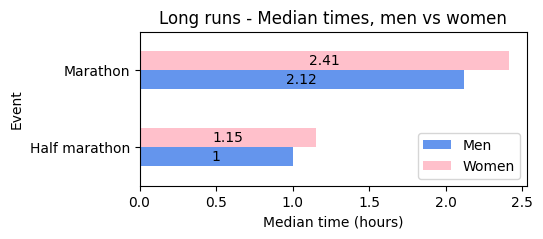

In [27]:
ax = (df[['Gender','Event','Time_Delta_Seconds']].loc[
    df['Event'].str.lower().str.contains('marathon')].groupby(
        ['Event','Gender']).median()/3600).round(2).unstack().plot.barh(
            figsize=(5,2),xlabel='Median time (hours)',color=('cornflowerblue','pink'))

plt.title("Long runs - Median times, men vs women")
ax.legend(('Men','Women'))
ax.bar_label(ax.containers[0], label_type="center")
ax.bar_label(ax.containers[1], label_type="center")
plt.show()

#### Medium runs

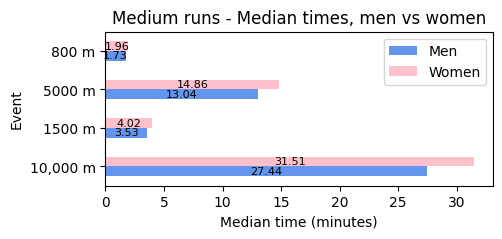

In [28]:
events_list = ('800 m', '1500 m', '5000 m','10,000 m')
ax = (df[['Gender','Event','Time_Delta_Seconds']].loc[
    df['Event'].isin(events_list)].groupby(
        ['Event','Gender']).median()/60).round(2).unstack().plot.barh(figsize=(5,2),xlabel='Median time (minutes)',color=('cornflowerblue','pink'))
plt.title("Medium runs - Median times, men vs women")
ax.legend(('Men','Women'))
ax.bar_label(ax.containers[0], label_type="center",fontsize=8)
ax.bar_label(ax.containers[1], label_type="center",fontsize=8)
plt.show()

#### Short runs

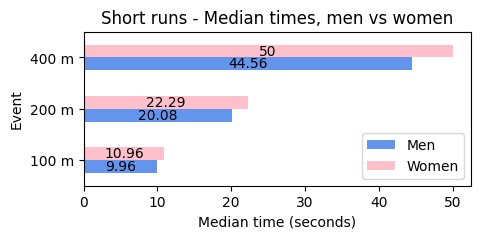

In [29]:
events_list = ('100 m', '200 m', '400 m')
ax = df[['Gender','Event','Time_Delta_Seconds']].loc[
    df['Event'].isin(events_list)].groupby(
        ['Event','Gender']).median().unstack().plot.barh(figsize=(5,2),xlabel='Median time (seconds)',color=('cornflowerblue','pink'))
plt.title("Short runs - Median times, men vs women")
ax.legend(('Men','Women'))
ax.bar_label(ax.containers[0], label_type="center")
ax.bar_label(ax.containers[1], label_type="center")
plt.show()

#### Difference in median times between men and women

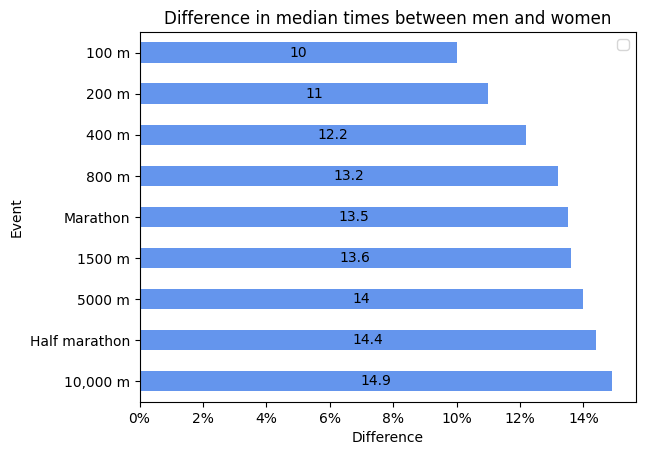

In [30]:
df_delta = (df[['Gender','Event','Time_Delta_Seconds']].groupby(
        ['Event','Gender']).median()).unstack()
df_delta['Difference'] = ((df_delta[('Time_Delta_Seconds', 'Women')]-df_delta[('Time_Delta_Seconds', 'Men')])/df_delta[('Time_Delta_Seconds', 'Men')]).round(3)*100
df_delta.stack().columns
df_delta = df_delta.drop("Time_Delta_Seconds", axis='columns')
ax = df_delta.sort_values(by = 'Difference', ascending = False).plot.barh(xlabel='Difference',color=('cornflowerblue'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.bar_label(ax.containers[0], label_type="center")
# plt.legend(['Difference'])
plt.title("Difference in median times between men and women")
plt.legend('')
plt.show()

<ipython-input-31-4a146e109c25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['time'] = pd.to_datetime(temp_df["Time_Delta_Seconds"], unit='s').apply(lambda x: x.strftime("%H:%M:%S.%f"))
<ipython-input-31-4a146e109c25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['time'] = pd.to_datetime(temp_df['time'], format='%H:%M:%S.%f')


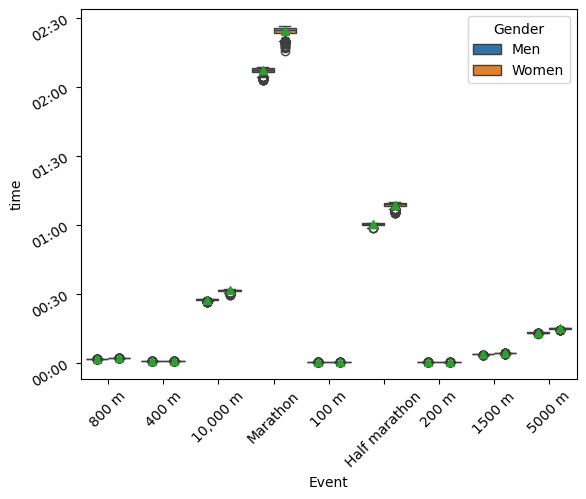

<Figure size 2000x1000 with 0 Axes>

In [31]:
temp_df = df[['Gender','Event','Time_Delta_Seconds']]
temp_df['time'] = pd.to_datetime(temp_df["Time_Delta_Seconds"], unit='s').apply(lambda x: x.strftime("%H:%M:%S.%f"))
temp_df['time'] = pd.to_datetime(temp_df['time'], format='%H:%M:%S.%f')

sns.boxplot(
    x = "Event",
    y = "time",
    hue = "Gender",
    showmeans=True,  # Show mean values as well
    data=temp_df
)

plt.setp(plt.gca().yaxis.get_majorticklabels(),'rotation', 30)
plt.gca().yaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.figure(figsize=(20,10))
plt.show()

del temp_df

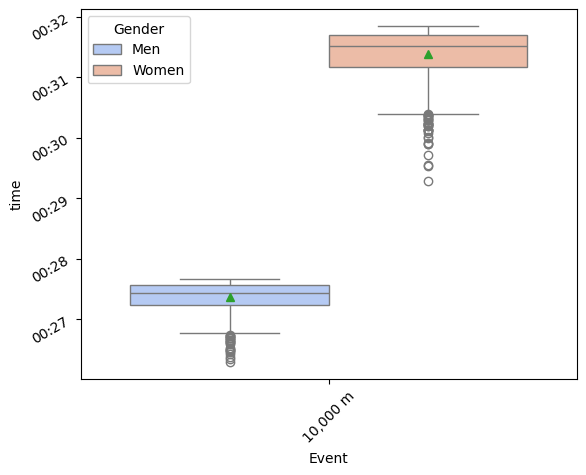

In [32]:
temp_df = df[['Gender','Event','Time_Delta_Seconds']].loc[df['Event']=='10,000 m'].copy()
temp_df['time'] = pd.to_datetime(temp_df["Time_Delta_Seconds"], unit='s').apply(lambda x: x.strftime("%M:%S.%f")).copy()
temp_df['time'] = pd.to_datetime(temp_df['time'], format='%M:%S.%f')

sns.boxplot(
    palette = 'coolwarm',
    x = "Event",
    y = "time",
    hue = "Gender",
    showmeans=True,  # Show mean values as well
    data=temp_df
)

plt.setp(plt.gca().yaxis.get_majorticklabels(),'rotation', 30)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.show()

del temp_df

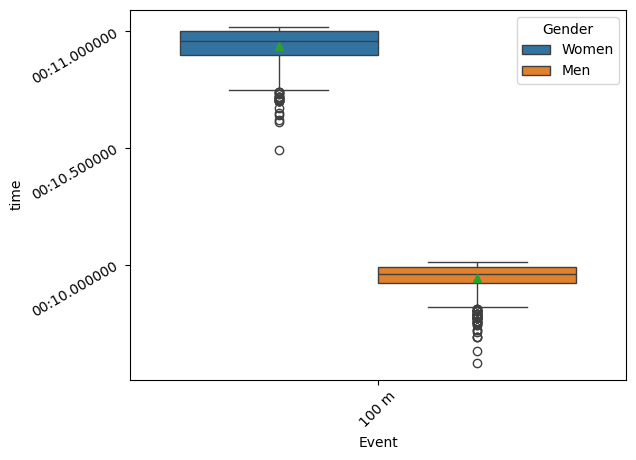

In [33]:
temp_df = df[['Gender','Event','Time_Delta_Seconds']].loc[df['Event']=='100 m'].copy()
temp_df['time'] = pd.to_datetime(temp_df["Time_Delta_Seconds"], unit='s').apply(lambda x: x.strftime("%M:%S.%f")).copy()
temp_df['time'] = pd.to_datetime(temp_df['time'], format='%M:%S.%f')

sns.boxplot(
    palette=None,
    x = "Event",
    y = "time",
    hue = "Gender",
    showmeans=True,  # Show mean values as well
    data=temp_df
)

plt.setp(plt.gca().yaxis.get_majorticklabels(),'rotation', 30)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(dates.DateFormatter("%M:%S.%f"))
plt.show()

del temp_df

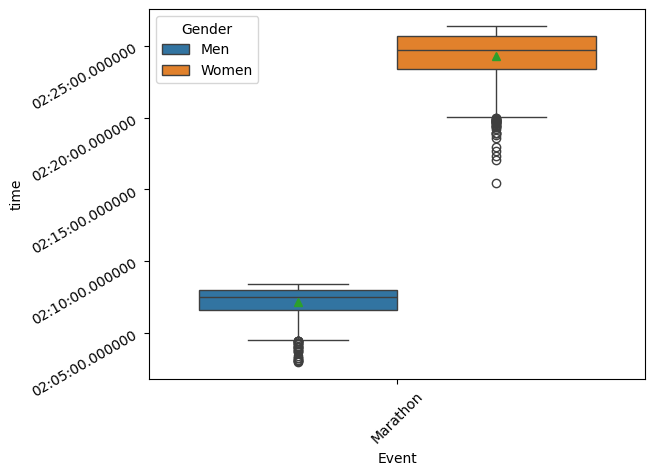

In [34]:
temp_df = df[['Gender','Event','Time_Delta_Seconds']].loc[df['Event']=='Marathon'].copy()
temp_df['time'] = pd.to_datetime(temp_df["Time_Delta_Seconds"], unit='s').apply(lambda x: x.strftime("%H:%M:%S.%f")).copy()
temp_df['time'] = pd.to_datetime(temp_df['time'], format='%H:%M:%S.%f')

sns.boxplot(
    palette=None,
    x = "Event",
    y = "time",
    hue = "Gender",
    showmeans=True,  # Show mean values as well
    data=temp_df
)

plt.setp(plt.gca().yaxis.get_majorticklabels(),'rotation', 30)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S.%f"))
plt.show()

del temp_df



### Runners ditribution - count by: country, region


#### By country


##### Runners count by country - general count

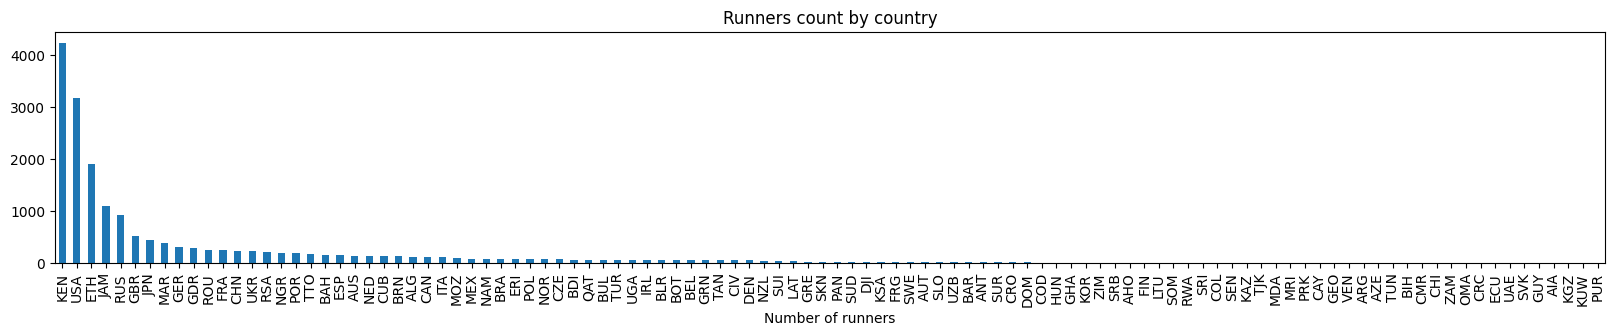

In [35]:
name_counts = df.Name.value_counts()
ax = df[df['Name'].isin(name_counts.index)].groupby('Country').size().sort_values(ascending=False).plot.bar(figsize=(20,3))
# ax.bar_label(ax.containers[0], label_type="edge")
plt.xlabel('Number of runners')
plt.title('Runners count by country')
plt.show()

##### Runners by country - Men vs Women - count

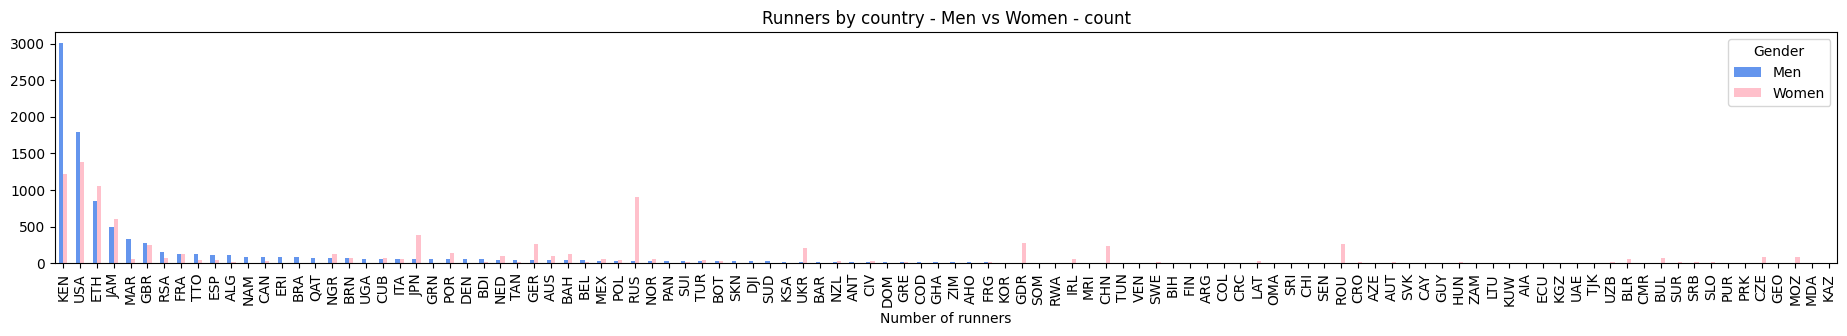

In [36]:
ax = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Men',ascending=False).plot.bar(figsize=(23,3),color=('cornflowerblue','pink'))
# ax.bar_label(ax.containers[0], label_type="edge",fontsize=8)
# ax.bar_label(ax.containers[1], label_type="edge",fontsize=8)
plt.xlabel('Number of runners')
plt.title('Runners by country - Men vs Women - count')
plt.show()

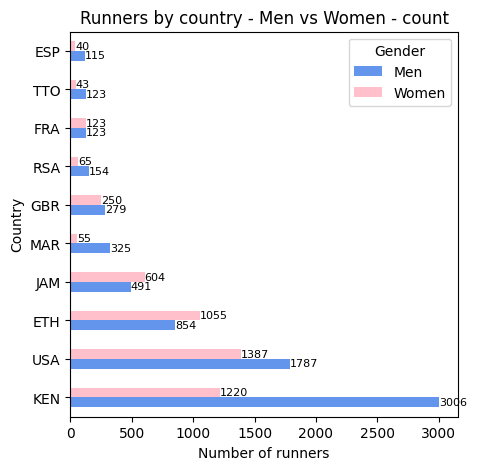

In [37]:
ax = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Men',ascending=False).head(10).plot.barh(figsize=(5,5),color=('cornflowerblue','pink'))
ax.bar_label(ax.containers[0], label_type="edge",fontsize=8)
ax.bar_label(ax.containers[1], label_type="edge",fontsize=8)
plt.xlabel('Number of runners')
plt.title('Runners by country - Men vs Women - count')
plt.show()

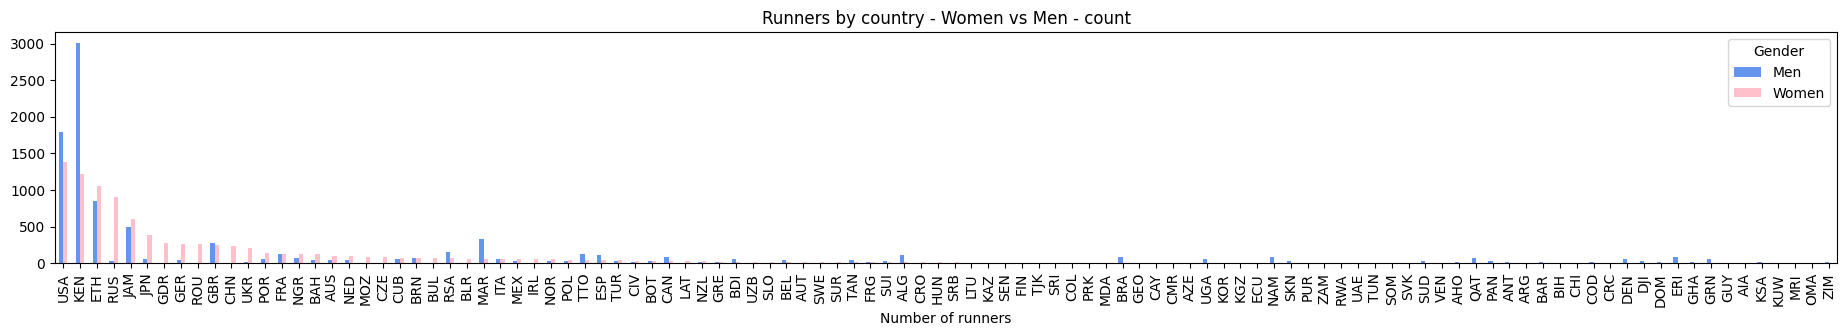

In [38]:
ax = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Women',ascending=False).plot.bar(figsize=(23,3),color=('cornflowerblue','pink'))
plt.xlabel('Number of runners')
plt.title('Runners by country - Women vs Men - count')
plt.show()

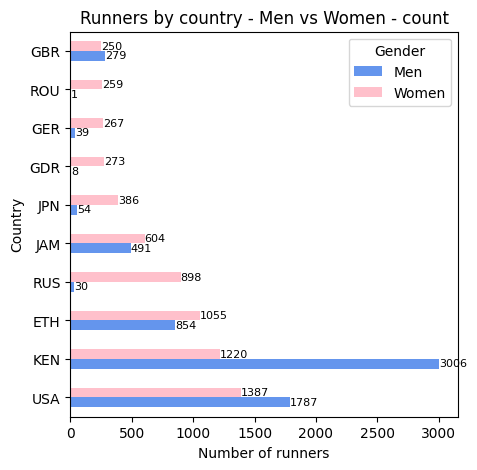

In [39]:
ax = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Women',ascending=False).head(10).plot.barh(figsize=(5,5),color=('cornflowerblue','pink'))
ax.bar_label(ax.containers[0], label_type="edge",fontsize=8)
ax.bar_label(ax.containers[1], label_type="edge",fontsize=8)
plt.xlabel('Number of runners')
plt.title('Runners by country - Men vs Women - count')
plt.show()

##### Runners by country - Men vs Women - difference

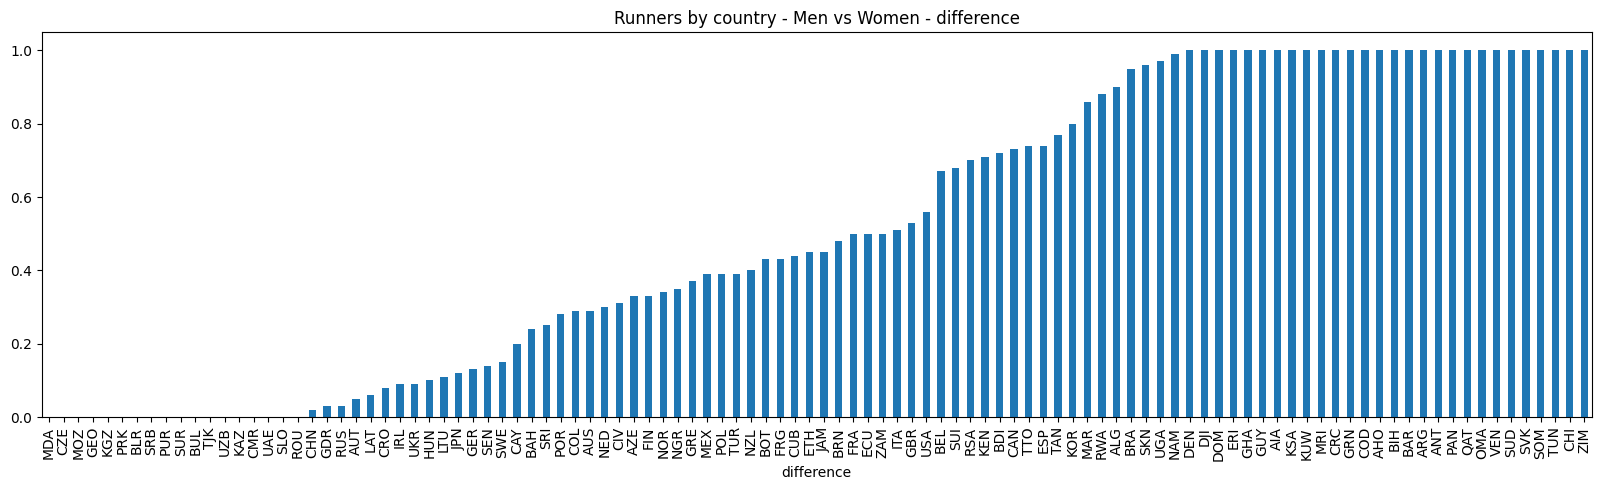

In [40]:
df_agg = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Women',ascending=False).copy()
df_agg['diff'] = (df_agg['Men']/(df_agg['Men'] + df_agg['Women'])).sort_values(ascending=False)
ax = df_agg['diff'].sort_values(ascending=True).round(2).plot.bar(figsize=(20,5))
plt.xlabel('difference')
plt.title('Runners by country - Men vs Women - difference')
plt.show()
del df_agg

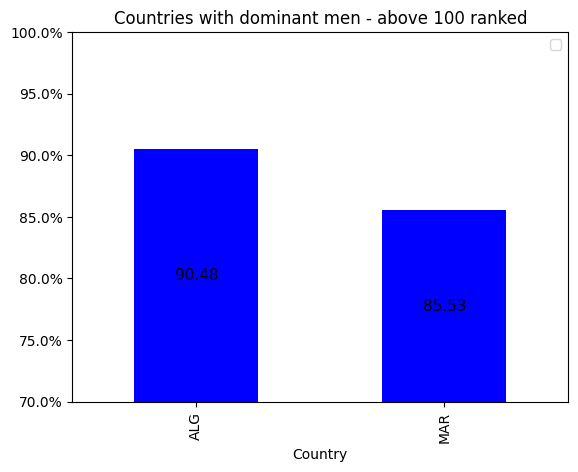

In [41]:
df_agg = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Men',ascending=False).copy()
df_agg['diff'] = (df_agg['Men']/(df_agg['Men'] + df_agg['Women'])).sort_values(ascending=True)
df_agg = df_agg.loc[(df_agg['diff'].between(0.75,1) & ((df_agg['Men']+df_agg['Women']) >100 ))].sort_values(by=['diff'], ascending=False)
df_agg['diff'] = df_agg['diff'].round(4)
df_agg.drop(['Men','Women'],axis=1,inplace=True)
df_agg['diff'] = (df_agg['diff']*100).copy()
ax = df_agg.plot.bar(ylim=(70,100),color='b')

ax.bar_label(ax.containers[0], label_type="center",size=11)
plt.title('Countries with dominant men - above 100 ranked')

def pct_formatter(value, pos):
  return f"{value}%"

plt.legend('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(pct_formatter))
plt.show()

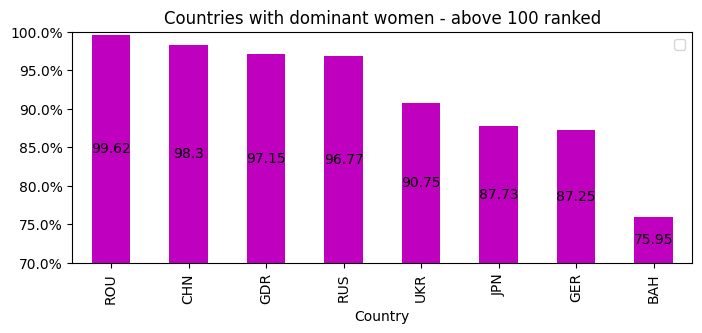

In [42]:
df_agg = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Women',ascending=False).copy()
df_agg['diff'] = (df_agg['Women']/(df_agg['Men'] + df_agg['Women'])).sort_values(ascending=True)
df_agg = df_agg.loc[(df_agg['diff'].between(0.75,1) & ((df_agg['Men']+df_agg['Women']) >100 ))].sort_values(by=['diff'], ascending=False)
df_agg['diff'] = df_agg['diff'].round(4)
df_agg.drop(['Men','Women'],axis=1,inplace=True)
df_agg['diff'] = (df_agg['diff']*100).copy()
ax = df_agg.plot.bar(figsize=(8,3),ylim=(70,100),color='m')
ax.bar_label(ax.containers[0], label_type="center")
plt.title('Countries with dominant women - above 100 ranked')

def pct_formatter(value, pos):
  return f"{value}%"

plt.legend('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(pct_formatter))
plt.show()

In [43]:
df.loc[df['Country'] == 'RUS'].groupby('Event').size()

,0
Event,
"10,000 m",71
100 m,30
1500 m,242
200 m,83
400 m,97
5000 m,40
800 m,298
Half marathon,11
Marathon,56


In [44]:
print("countries without female runners but has male runners")
df_agg = df[['Country','Gender']].groupby(['Country','Gender']).size().unstack().fillna(0).sort_values(
    by='Women',ascending=False).copy()
df_agg['diff'] = (df_agg['Men']/(df_agg['Men'] + df_agg['Women'])).sort_values(ascending=True)
print(df_agg.loc[(df_agg['diff'] == 1) & (df_agg['Men'] > 20)])
del df_agg

countries without female runners but has male runners
Gender    Men  Women  diff
Country                   
SUD      23.0    0.0   1.0
QAT      69.0    0.0   1.0
PAN      25.0    0.0   1.0
DEN      50.0    0.0   1.0
DJI      23.0    0.0   1.0
ERI      82.0    0.0   1.0
GRN      54.0    0.0   1.0
KSA      21.0    0.0   1.0


In [45]:
df.loc[df['Country'] == 'KEN'].groupby('Name').size().sort_values(ascending=False)
df.loc[df['Name'] == 'David Rudisha']
df_check_name_event_num= df.loc[df['Country'] == 'KEN'].groupby(['Name','Event']).size()
df_test= df_check_name_event_num.unstack()
df_test= ~df_test.isna()
df_test
df_test['Sum'] = df_test.sum(axis=1)
df_test= df_test.loc[df_test.Sum>=5]
df_test

Event,"10,000 m",1500 m,200 m,400 m,5000 m,800 m,Half marathon,Marathon,Sum
Name,,,,,,,,,
Eliud Kipchoge,True,True,False,False,True,False,True,True,5


In [46]:
print("Eritrea is not participating in any short run event shorter than 5000 m")
print("Eritrea women is not participating event")
df.loc[df['Country'] == 'ERI'].groupby('Event').size()

Eritrea is not participating in any short run event shorter than 5000 m
Eritrea women is not participating event


,0
Event,
"10,000 m",25
5000 m,5
Half marathon,39
Marathon,13


In [47]:
df.loc[df['Country'] == 'QAT'].groupby('Name').size()

,0
Name,
Abdalelah Haroun,5
Abdullah Ahmad Hassan,12
Abdulrahman Musaeb Bala,6
Ali Saadoun Al-Dawoodi,1
Dahame Najem Bashir,3
Essa Ismail Rasheed,5
Felix Kibore,1
Femi Ogunode,18
Ibrahim Ismail,2


In [48]:
df.loc[df['Country'] == 'QAT'].groupby('Event').size()

,0
Event,
"10,000 m",15
100 m,11
1500 m,6
200 m,8
400 m,7
5000 m,9
800 m,7
Half marathon,2
Marathon,4


##### Most frequent runners - all - men vs women

#### By region


##### top 20 frequent

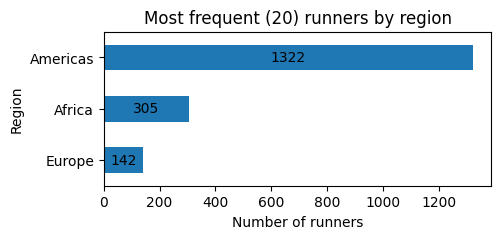

In [49]:
name_counts = df.Name.value_counts()
ax =df[df['Name'].isin(name_counts.nlargest(20).index)].groupby('Region').size().sort_values(ascending=True).plot.barh(figsize=(5,2))
ax.bar_label(ax.containers[0], label_type="center")
plt.xlabel('Number of runners')
plt.title('Most frequent (20) runners by region')
plt.show()

### Runners count by age category

#### General plot

In [50]:
df.value_counts('Category')

,count
Category,
N25,7447
N20,6573
N30,3124
NJ,586
N35,484
N40,27
N13,1
N60,1
N15,0


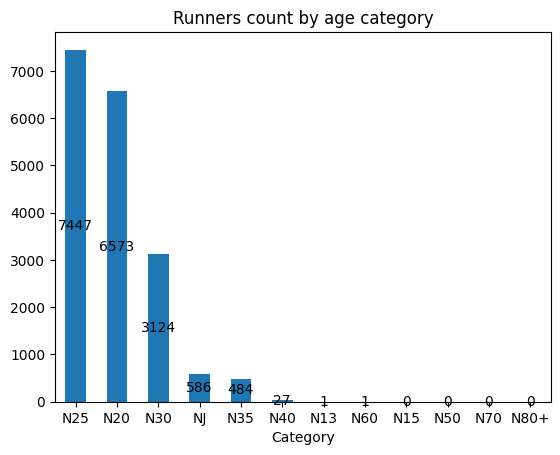

In [51]:
ax = df.value_counts('Category').plot.bar(rot=0)
ax.bar_label(ax.containers[0], label_type="center")
plt.title('Runners count by age category')
plt.show()

#### Median times, men vs women - by categories

##### Short runs

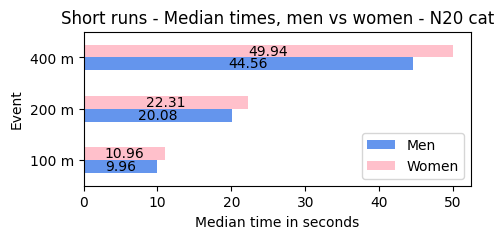

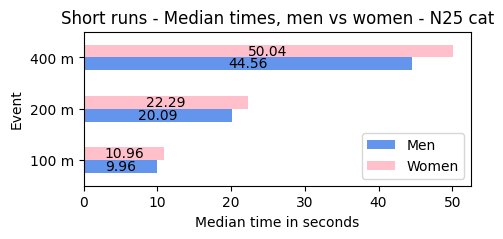

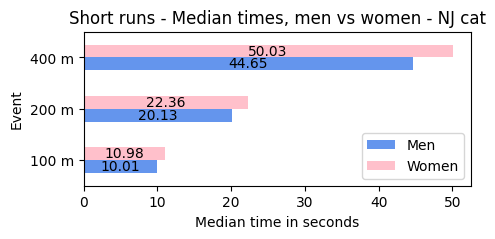

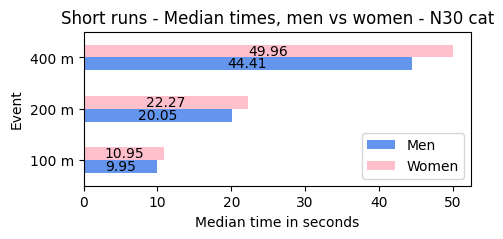

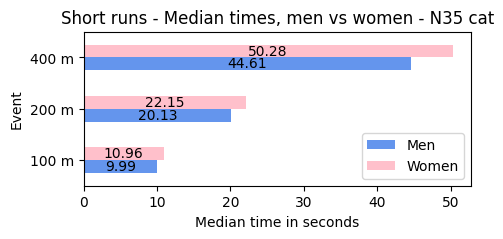

An exception occurred in category:  nan 
exception: no numeric data to plot


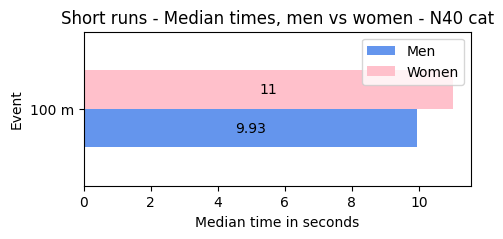

An exception occurred in category:  N13 
exception: no numeric data to plot
An exception occurred in category:  N60 
exception: no numeric data to plot


In [52]:
events_list = ('100 m', '200 m', '400 m')

for cat in df['Category'].unique():
  try:
    ax = df[['Gender','Event','Time_Delta_Seconds']].loc[
        (df['Event'].isin(events_list)) & (df['Category']==cat)
        ].groupby(
            ['Event','Gender']).median().round(2).unstack().plot.barh(figsize=(5,2),xlabel='Median time in seconds',color=('cornflowerblue','pink'))
    plt.title("Short runs - Median times, men vs women - "+cat+" cat")
    ax.legend(('Men','Women'))
    ax.bar_label(ax.containers[0], label_type="center")
    ax.bar_label(ax.containers[1], label_type="center")
    plt.show()
  except Exception as e:
    print("An exception occurred in category: ",cat, "\nexception:",e)

##### Long runs

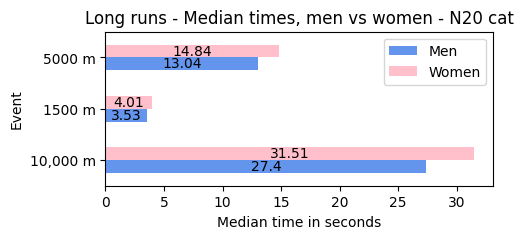

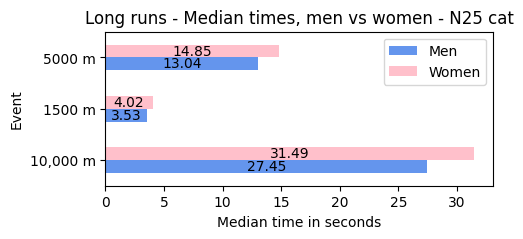

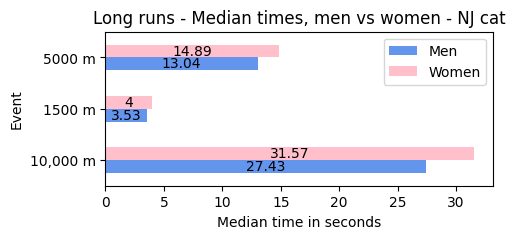

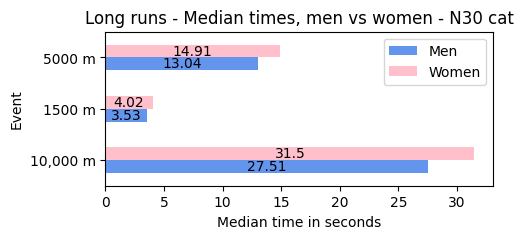

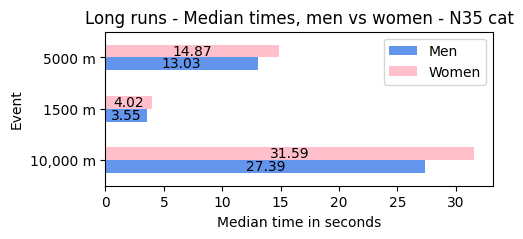

An exception occurred in category:  nan 
exception: no numeric data to plot


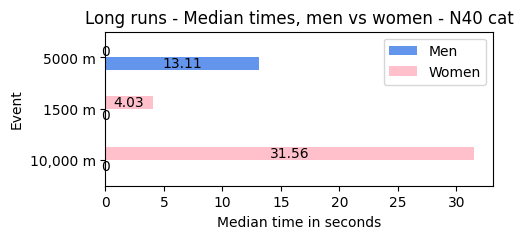

An exception occurred in category:  N13 
exception: no numeric data to plot
An exception occurred in category:  N60 
exception: no numeric data to plot


In [53]:
events_list = ('1500 m', '5000 m','10,000 m')

for cat in df['Category'].unique():
  try:
    ax = (df[['Gender','Event','Time_Delta_Seconds']].loc[
        (df['Event'].isin(events_list)) & (df['Category']==cat)
        ].groupby(
            ['Event','Gender']).median()/60).round(2).unstack().plot.barh(figsize=(5,2),xlabel='Median time in seconds',color=('cornflowerblue','pink'))
    plt.title("Long runs - Median times, men vs women - "+cat+" cat")
    ax.legend(('Men','Women'))
    ax.bar_label(ax.containers[0], label_type="center")
    ax.bar_label(ax.containers[1], label_type="center")
    plt.show()
  except Exception as e:
    print("An exception occurred in category: ",cat, "\nexception:",e)

In [54]:
df.loc[
    (df['Category'] == 'N40') &
    (df['Event'] == '5000 m')
    ]

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
13125,895,00:13:06.680000,Bernard Lagat,USA,1974-12-12,2.0,Berlin,2014-08-31,Men,5000 m,Americas,0 days 00:13:06.680000,786.68,40,2014,2011-2020,5000,N40
13140,910,00:13:06.780000,Bernard Lagat,USA,1974-12-12,5.0,Rio de Janeiro,2016-08-20,Men,5000 m,Americas,0 days 00:13:06.780000,786.78,42,2016,2011-2020,5000,N40


##### Marathons

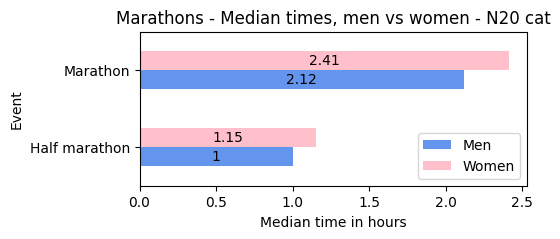

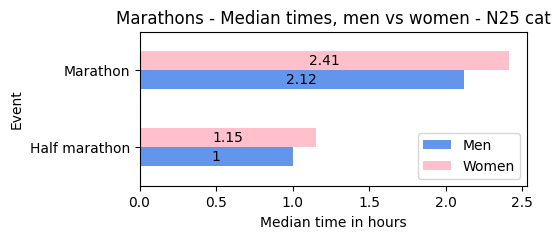

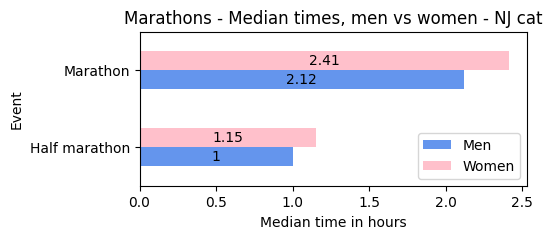

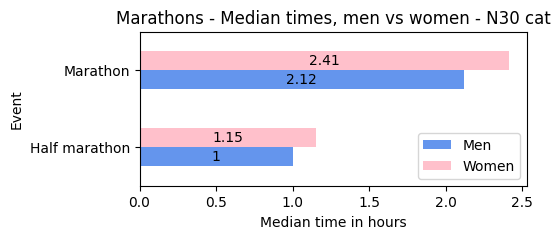

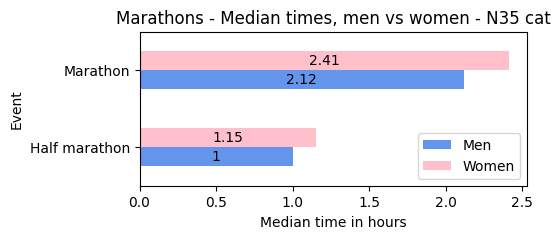

An exception occurred in category:  nan 
exception: can only concatenate str (not "float") to str


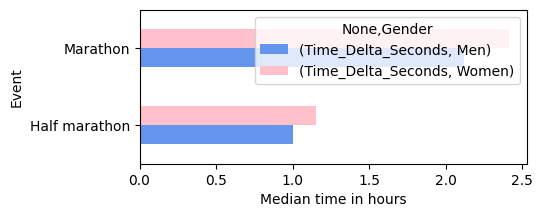

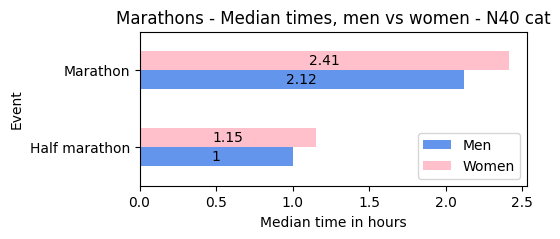

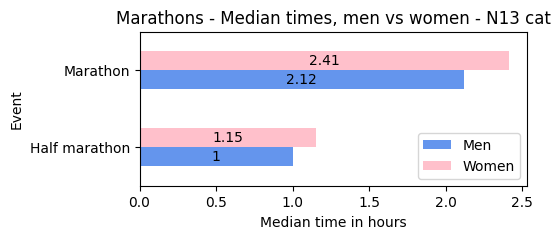

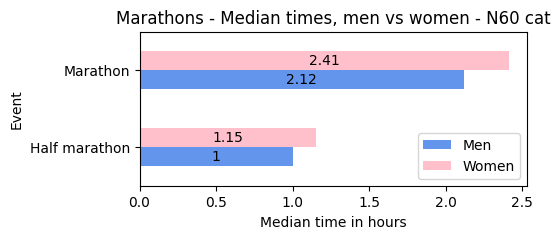

In [55]:
for cat in df['Category'].unique():
  try:
    ax = (df[['Gender','Event','Time_Delta_Seconds']].loc[
    df['Event'].str.lower().str.contains('marathon')].groupby(
        ['Event','Gender']).median()/3600).round(2).unstack().plot.barh(figsize=(5,2),xlabel='Median time in hours',color=('cornflowerblue','pink'))
    plt.title("Marathons - Median times, men vs women - "+cat+" cat")
    ax.legend(('Men','Women'))
    ax.bar_label(ax.containers[0], label_type="center")
    ax.bar_label(ax.containers[1], label_type="center")
    plt.show()
  except Exception as e:
    print("An exception occurred in category: ",cat, "\nexception:",e)

### Runners Region Distribution

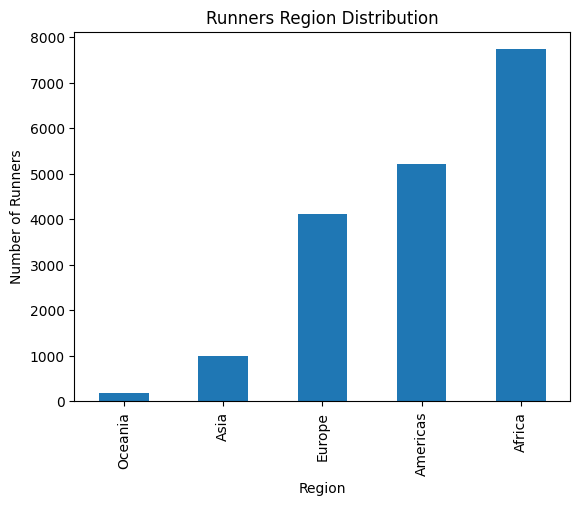

Region
Oceania      0.975663
Asia         5.486735
Europe      22.577286
Americas    28.562815
Africa      42.397501
dtype: float64


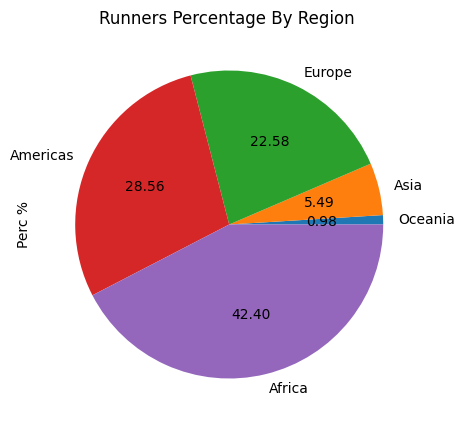

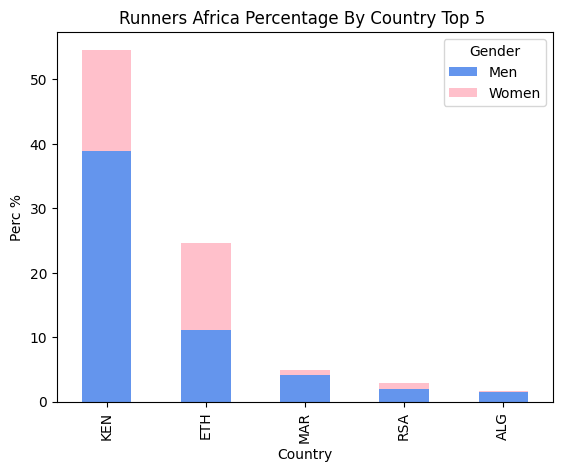

In [56]:
df_bar_Region= df.groupby('Region').size()
df_bar_Region.sort_values(inplace=True)
df_bar_Region.plot.bar()
plt.title('Runners Region Distribution')
plt.ylabel('Number of Runners')
plt.show()
total = df_bar_Region.sum()
percentage1 = (df_bar_Region / total) * 100
print(percentage1)
percentage1.sort_values(inplace=True)
percentage1.plot.pie(y='Region', figsize=(5, 5),autopct='%.2f')
plt.title('Runners Percentage By Region ')
plt.ylabel('Perc %')
plt.show()

df_bar_Africa= df.loc[(df['Region']=='Africa')].groupby(['Country','Gender']).size()
df_bar_Africa.sort_values(inplace=True,ascending=False)

total = df_bar_Africa.sum()
percentage = (df_bar_Africa / total) * 100
percentage.sort_values(inplace=True)
# print(percentage)
percentage.unstack().nlargest(5,'Men').plot.bar(stacked=True,color=('cornflowerblue','pink'))
plt.title('Runners Africa Percentage By Country Top 5 ')
plt.ylabel('Perc %')
plt.show()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
2516,513,00:27:26.680000,Jacob Kiplimo,UGA,1900-11-14,3.0,Bydgoszcz,2016-07-19,Men,"10,000 m",Africa,0 days 00:27:26.680000,1646.68,116,2016,2011-2020,10000,NaN


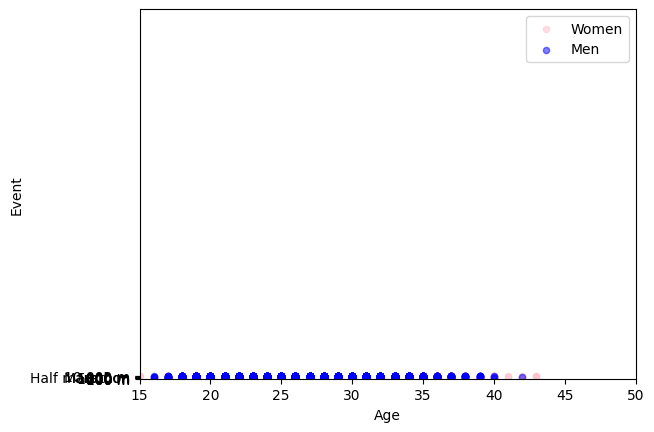

In [57]:
ax = df.loc[df['Gender']=='Women']\
    .plot.scatter(x='Age', y='Event', c='pink', ylim=[0, 1000],xlim=[15,50], alpha=0.5)
df.loc[df['Gender']=='Men']\
    .plot.scatter(x='Age', y='Event', c='blue', ax=ax, alpha=0.5)
ax.legend(['Women', 'Men']);
df.loc[df['Date of Birth'].str.contains('1900') ]

# ax = df.loc[df['Gender']=='Women']\
#     .plot.scatter(x='Age', y='Event', c='pink',xlim=[15,50], alpha=0.5)
# df.loc[df['Gender']=='Men']\
#     .plot.scatter(x='Age', y='Event', c='blue', ax=ax, alpha=0.2)
# ax.legend(['Women', 'Men']);


### Runners distribution by years

#### Rank distribution per years groups

In [58]:
df.loc[df['Date']<'1970-03-02 00:00:00'].sort_values(by='Rank').head(3)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Region,Time_Delta,Time_Delta_Seconds,Age,Year,Year_Cat,Event_Clean,Category
7202,33,00:00:43.860000,Lee Evans,USA,1947-02-25,1.0,Ciudad de México,1968-10-18,Men,400 m,Americas,0 days 00:00:43.860000,43.86,22,1968,1960-1970,400,N20
7226,57,00:00:43.970000,Larry James,USA,1947-11-06,2.0,Ciudad de México,1968-10-18,Men,400 m,Americas,0 days 00:00:43.970000,43.97,21,1968,1960-1970,400,N20
10284,81,00:00:19.830000,Tommie Smith,USA,1944-06-12,1.0,Ciudad de México,1968-10-16,Men,200 m,Americas,0 days 00:00:19.830000,19.83,24,1968,1960-1970,200,N20


In [59]:
new_df = df.groupby(['Region','Event_Clean','Year_Cat']).size().to_frame()

<ipython-input-59-3d14840058cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df = df.groupby(['Region','Event_Clean','Year_Cat']).size().to_frame()


insight: 5000 m run holds the most 90's ranks


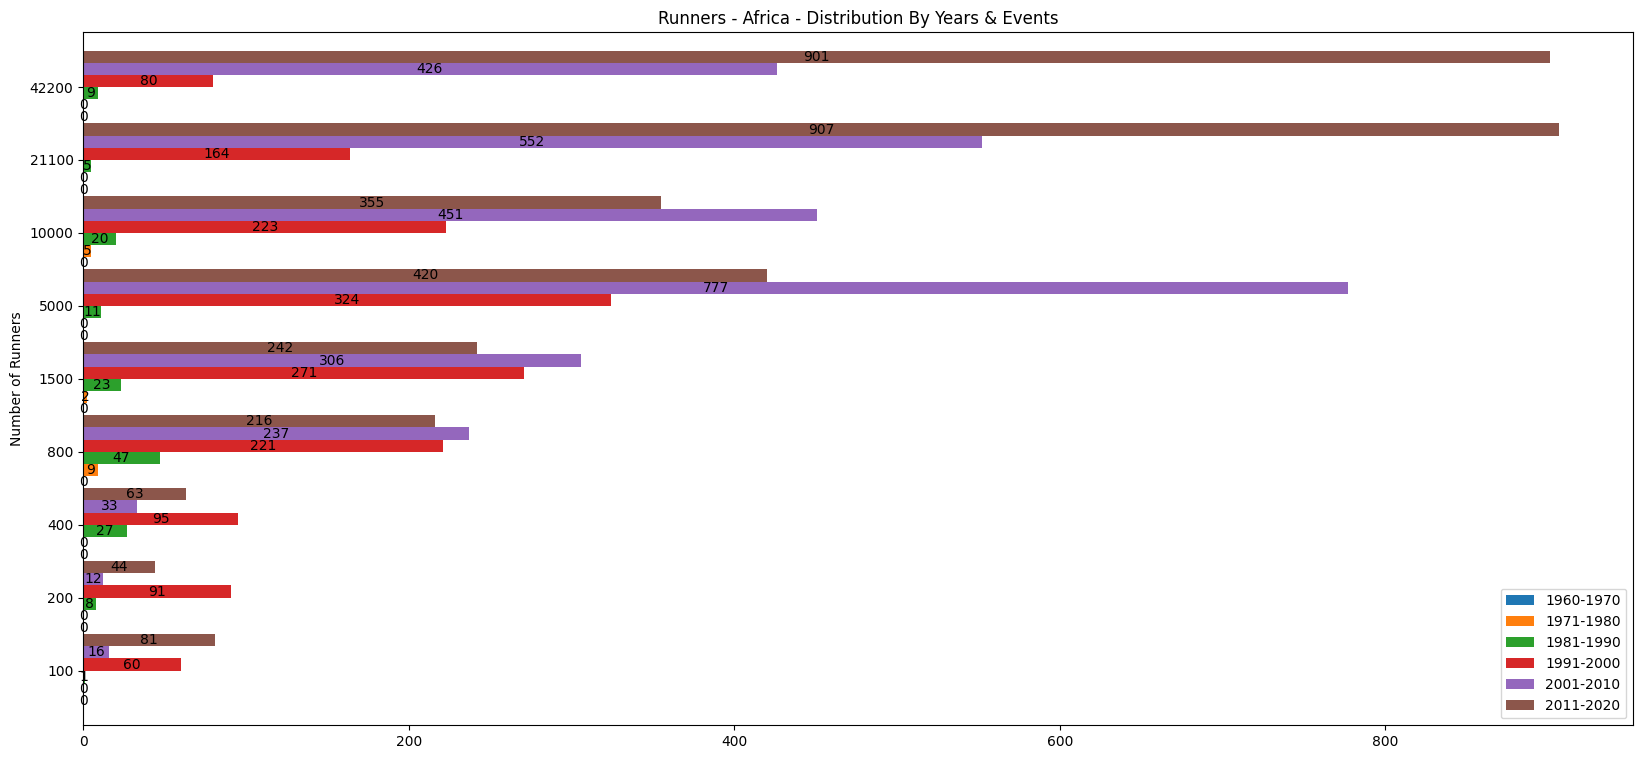

In [60]:
print("insight: 5000 m run holds the most 90's ranks")
ax = new_df[np.in1d(new_df.index.get_level_values('Region'), ['Africa'])].unstack().reset_index(level=0, drop=True).plot.barh(figsize=(20,9),width=1)
for c in ax.containers:
    ax.bar_label(c, label_type="center")
plt.title('Runners - Africa - Distribution By Years & Events')
plt.ylabel('Number of Runners')
plt.legend(new_df.index.get_level_values('Year_Cat').unique().values)

plt.show()

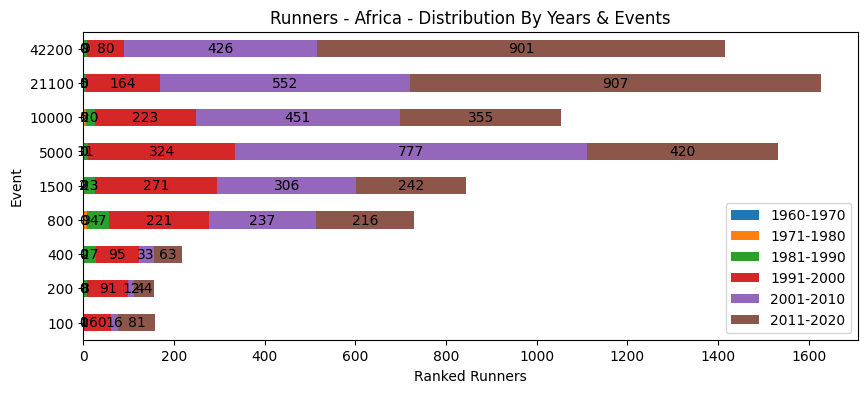

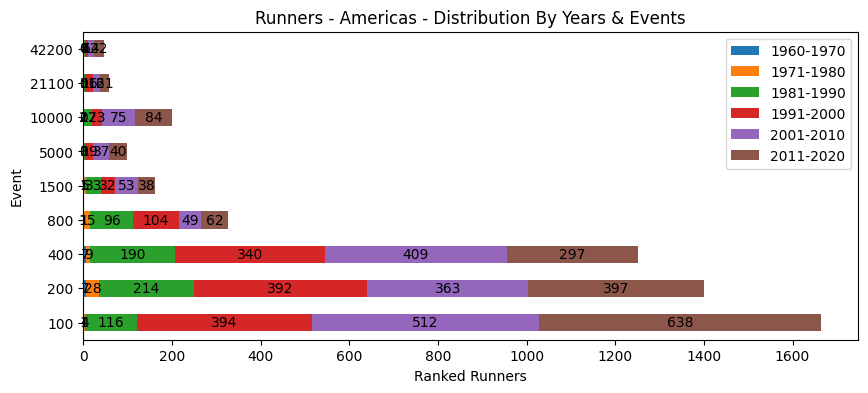

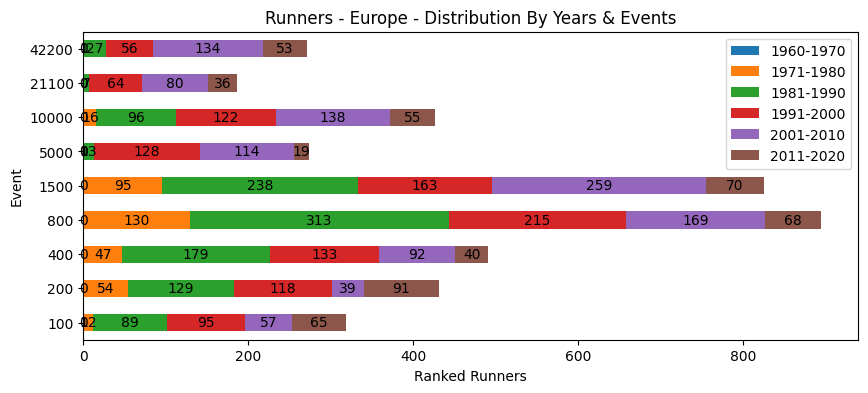

In [61]:
ax = new_df[np.in1d(new_df.index.get_level_values('Region'), ['Africa'])].unstack().reset_index(level=0, drop=True).plot.barh(figsize=(10,4), stacked=True)
for c in ax.containers:
    ax.bar_label(c, label_type="center")
plt.title('Runners - Africa - Distribution By Years & Events')
plt.xlabel('Ranked Runners')
plt.ylabel('Event')
plt.legend(new_df.index.get_level_values('Year_Cat').unique().values)

plt.show()

ax = new_df[np.in1d(new_df.index.get_level_values('Region'), ['Americas'])].unstack().reset_index(level=0, drop=True).plot.barh(figsize=(10,4), stacked=True)
for c in ax.containers:
    ax.bar_label(c, label_type="center")
plt.title('Runners - Americas - Distribution By Years & Events')
plt.xlabel('Ranked Runners')
plt.ylabel('Event')
plt.legend(new_df.index.get_level_values('Year_Cat').unique().values)

plt.show()

ax = new_df[np.in1d(new_df.index.get_level_values('Region'), ['Europe'])].unstack().reset_index(level=0, drop=True).plot.barh(figsize=(10,4), stacked=True)
for c in ax.containers:
    ax.bar_label(c, label_type="center")
plt.title('Runners - Europe - Distribution By Years & Events')
plt.xlabel('Ranked Runners')
plt.ylabel('Event')
plt.legend(new_df.index.get_level_values('Year_Cat').unique().values)

plt.show()

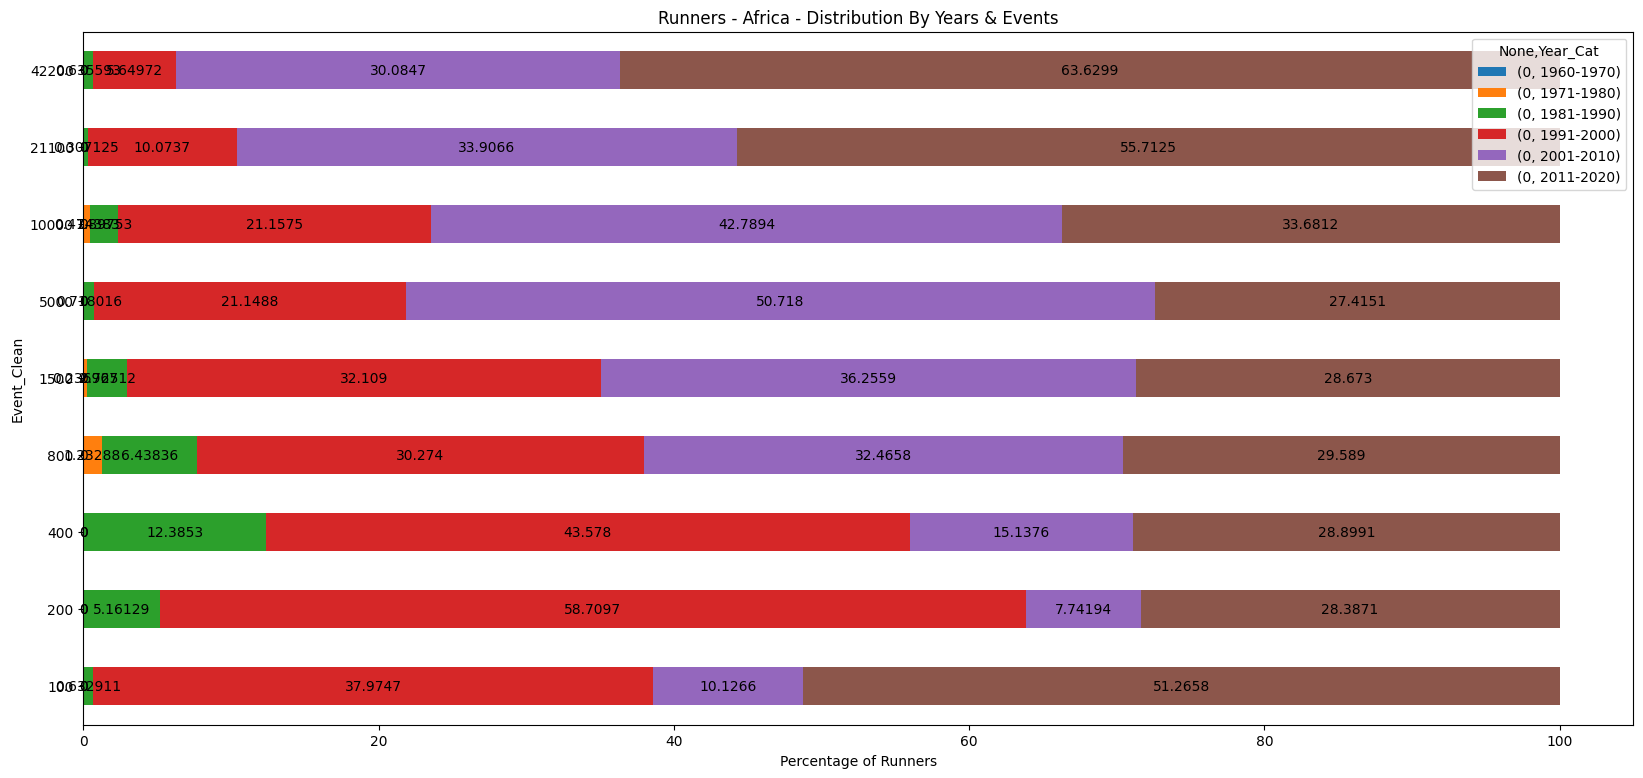

In [62]:
new_df2= new_df[np.in1d(new_df.index.get_level_values('Region'), ['Africa'])].unstack().reset_index(level=0, drop=True)
total2 = new_df2.sum(axis=1)
res = new_df2.div(new_df2.sum(axis=1), axis=0)
total2=res*100

ax = total2.plot.barh(figsize=(20,9), stacked=True)
for c in ax.containers:
    ax.bar_label(c, label_type="center")
plt.title('Runners - Africa - Distribution By Years & Events')
plt.xlabel('Percentage of Runners')
plt.show()

#### men vs women distribution

##### by Years (Ages, Gender, Region)

<ipython-input-63-94b4f7cd94e6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_year_gender= df.groupby(['Year_Cat','Gender']).size()


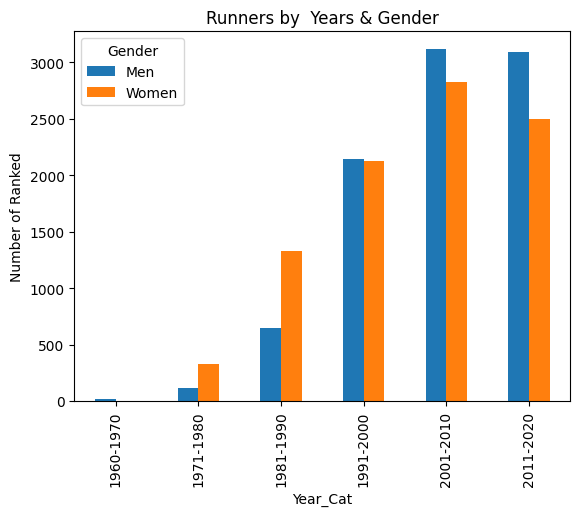

<ipython-input-63-94b4f7cd94e6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_year_age= df.groupby(['Year_Cat','Category']).size()


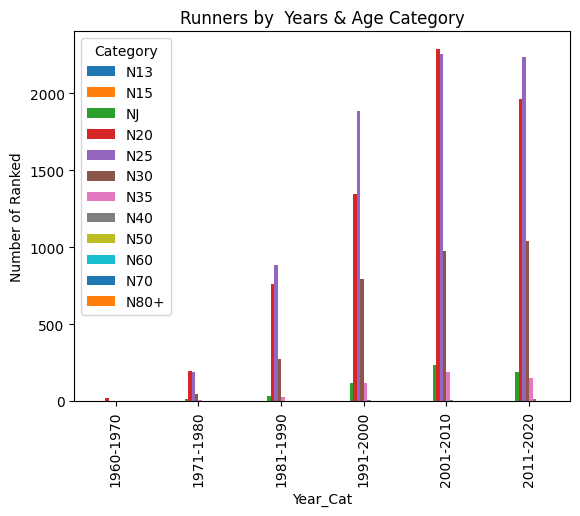

<ipython-input-63-94b4f7cd94e6>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_year_region= df.groupby(['Year_Cat','Region']).size()


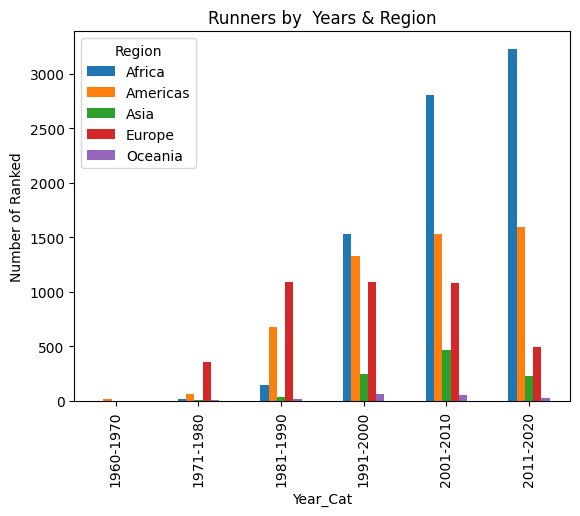

In [63]:
df_year_gender= df.groupby(['Year_Cat','Gender']).size()
df_year_gender=df_year_gender.unstack()
df_year_gender.reset_index()
df_year_gender
df_year_gender.plot.bar()
plt.title('Runners by  Years & Gender')
plt.ylabel('Number of Ranked')
plt.show()

df_year_age= df.groupby(['Year_Cat','Category']).size()
df_year_age=df_year_age.unstack()
df_year_age.reset_index()
df_year_age
df_year_age.plot.bar()
plt.title('Runners by  Years & Age Category')
plt.ylabel('Number of Ranked')
plt.show()

df_year_region= df.groupby(['Year_Cat','Region']).size()
df_year_region=df_year_region.unstack()
df_year_region.reset_index()
df_year_region
df_year_region.plot.bar()
plt.title('Runners by  Years & Region')
plt.ylabel('Number of Ranked')
plt.show()

##### Mean time of runs over the Years

<ipython-input-64-2fd83523fe7d>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Event'].str.lower().str.contains('marathon')].groupby(


                     Time_Delta_Seconds                                \
Year_Cat                      1981-1990 1991-2000 2001-2010 2011-2020   
Event         Gender                                                    
Half marathon Men              1.008056  1.007153  1.002650  1.001844   
              Women            1.148611  1.147951  1.146881  1.141853   
Marathon      Men              2.132118  2.127815  2.121114  2.116397   
              Women            2.412969  2.412942  2.407255  2.401971   

                                
Year_Cat             1971-1980  
Event         Gender            
Half marathon Men          NaN  
              Women        NaN  
Marathon      Men          NaN  
              Women   2.428333  


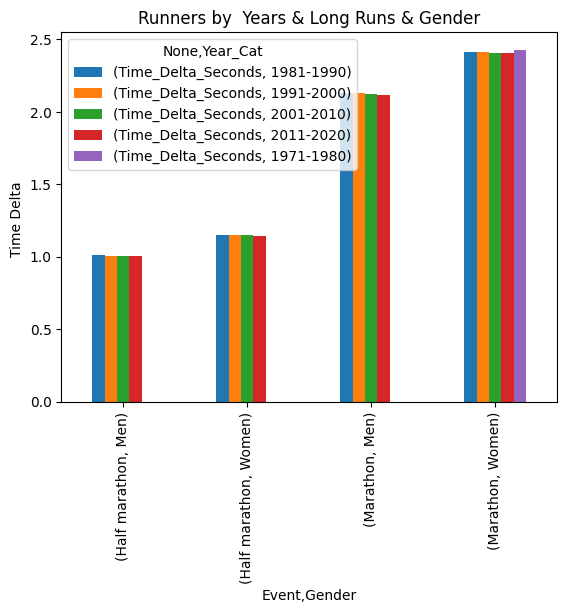

In [64]:
df_year_event= (df[['Gender','Event','Time_Delta_Seconds','Year_Cat']].loc[
    df['Event'].str.lower().str.contains('marathon')].groupby(
        ['Event','Gender','Year_Cat']).mean()/3600).dropna()

df_year_event=df_year_event.unstack()
df_year_event.reset_index()
print(df_year_event)
df_year_event.plot.bar()
plt.title('Runners by Years & Long Runs & Gender')
plt.ylabel('Time Delta')
plt.show()

##### Top ranked performers


Text(0, 0.5, 'Num of Rank=1 ')

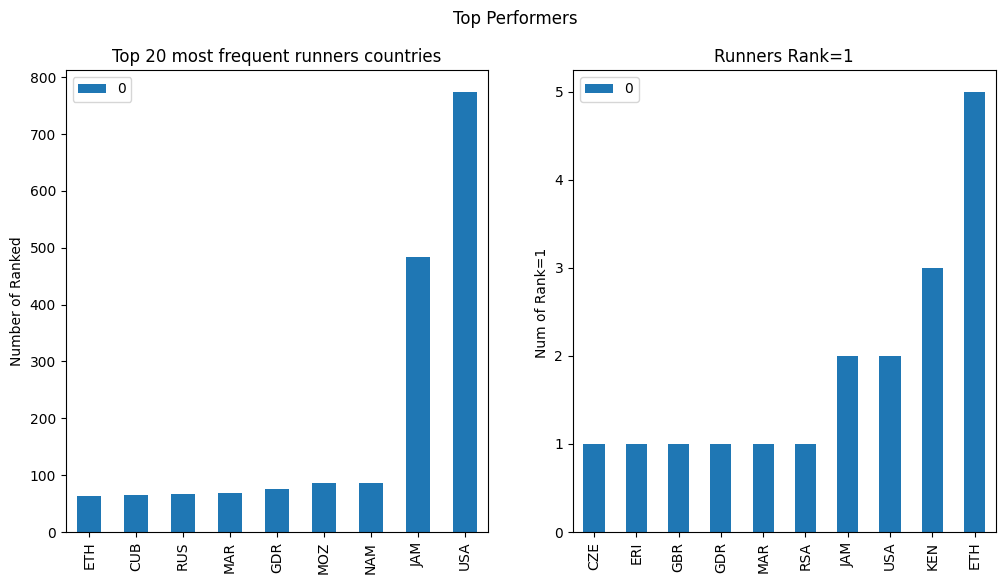

In [65]:
df_top_20= df.Name.value_counts().sort_values(ascending=False).head(20).to_frame()
top_20=df_top_20.index.to_list()
df_top_20= df.loc[df['Name'].isin(top_20)]
grpby_countries=df_top_20.groupby('Country').size()
df_top_20= grpby_countries.sort_values().to_frame()


df_rank_1= df.loc[df['Rank']==1]
df_rank_1= df_rank_1.groupby('Country').size()
df_rank_1= df_rank_1.sort_values().to_frame()


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# plot first pandas frame in subplot style
df_top_20.plot.bar(ax = axes[0],subplots=True ,title ='Top Performers')
# plot second pandas frame in subplot style
df_rank_1.plot.bar(ax = axes[1],subplots=True)
axes[0].set_title('Top 20 most frequent runners countries')
axes[0].set_xlabel("")
axes[0].set_ylabel("Number of Ranked")
axes[1].set_title('Runners Rank=1')
axes[1].set_xlabel("")
axes[1].set_ylabel("Num of Rank=1 ")

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

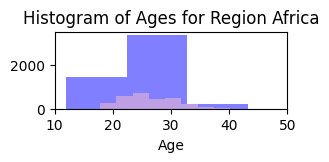

<Figure size 640x480 with 0 Axes>

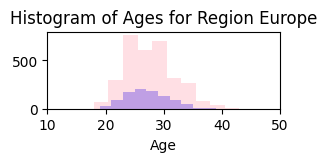

<Figure size 640x480 with 0 Axes>

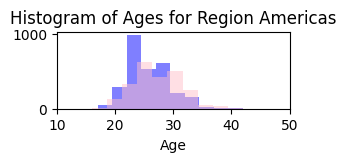

<Figure size 640x480 with 0 Axes>

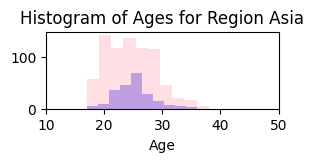

<Figure size 640x480 with 0 Axes>

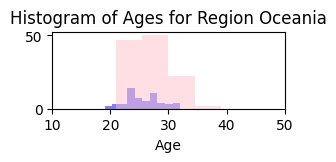

,Age,Region
927,23,Oceania
2468,29,Oceania
2604,24,Oceania
2606,23,Oceania
2689,30,Oceania


In [68]:
regions= df['Region'].unique()
plt.figure(figsize=(10,6))

for region in regions:
    df_age_men=df.loc[(df['Gender']=='Men')&(df['Region']==region), ['Age','Region']]
    df_age_women=df.loc[(df['Gender']=='Women')&(df['Region']==region), ['Age','Region']]
    fig = plt.figure()
    plt.figure(figsize=(3,1))
    plt.hist(df_age_men['Age'],  color='blue',alpha=0.5)
    plt.title('Histogram of Ages ')
    plt.hist(df_age_women['Age'],  color='pink',alpha=0.5)
    plt.title(f'Histogram of Ages for Region {region}')
    plt.xlabel('Age')
    plt.xlim([10, 50])
    plt.legend
    plt.show()

<Figure size 640x480 with 0 Axes>

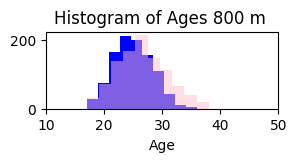

<Figure size 640x480 with 0 Axes>

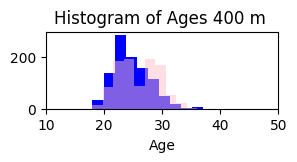

<Figure size 640x480 with 0 Axes>

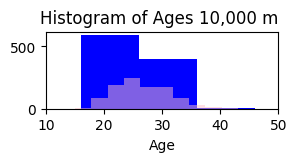

<Figure size 640x480 with 0 Axes>

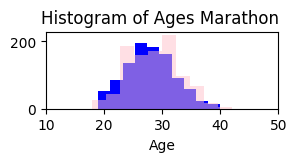

<Figure size 640x480 with 0 Axes>

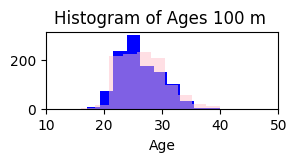

<Figure size 640x480 with 0 Axes>

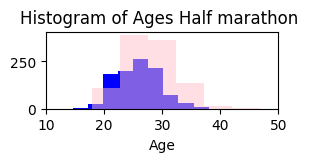

<Figure size 640x480 with 0 Axes>

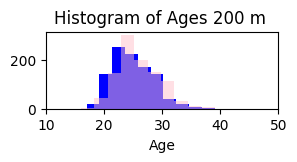

<Figure size 640x480 with 0 Axes>

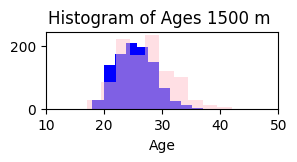

<Figure size 640x480 with 0 Axes>

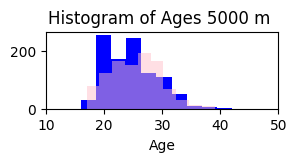

In [69]:
Events= df['Event'].unique()
for event in Events:
  df_age_men=df.loc[((df['Gender']=='Men')  & (df['Event']==event) ), ['Age']]
  df_age_women=df.loc[(df['Gender']=='Women')   & (df['Event']==event), ['Age']]
  fig = plt.figure()
  plt.figure(figsize=(3,1))
  plt.hist(df_age_men['Age'],  color='blue')
  plt.title('Histogram of Ages ')
  plt.hist(df_age_women['Age'],  color='pink',alpha=0.5)
  plt.title(f'Histogram of Ages {event} ')
  plt.xlabel('Age')
  plt.xlim([10, 50])
  plt.legend
  plt.show()

<Figure size 640x480 with 0 Axes>

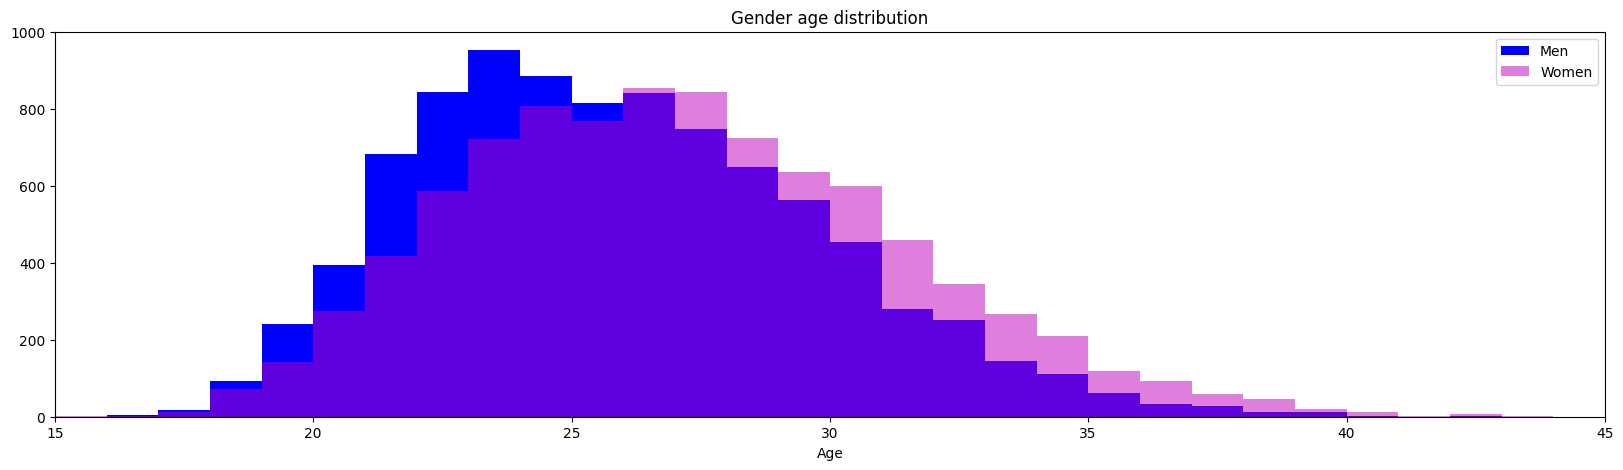

In [70]:
  df_age_men=df.loc[(df['Gender']=='Men')   , ['Age']]
  df_age_women=df.loc[(df['Gender']=='Women') , ['Age']]
  fig = plt.figure()
  plt.figure(figsize=(20,5))
  plt.hist(df_age_men['Age'],  color='b',bins=30,alpha=1,range=[15, 45])
  plt.title('Histogram of Ages ')
  plt.hist(df_age_women['Age'],  color='m',alpha=0.5,bins=30,range=[15, 45])
  plt.title(f'Gender age distribution')
  plt.xlabel('Age')
  plt.xlim([15, 45])
  plt.legend(('Men','Women'))
  plt.show()